# <b> JPMC Team #1: Company Relationship Analysis Tool </b>

In [30]:
import os
import pandas as pd

In [31]:
#filename = "/Users/annahauk/Desktop/Machine Learning/SP500AdjPrice.csv"
filename = os.path.join(os.getcwd(), "SP500AdjPrice.csv")
df = pd.read_csv(filename, header = 0)

In [32]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector

remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

#print(len(symbols))
#print(set(industries))

symbol_industry = dict(zip(symbols,industries))

df_industries = pd.DataFrame({'Industry': [symbol_industry[symbol] for symbol in symbols]})
df_industries.index = symbol_industry.keys()
df_industries = df_industries.sort_index()
df_industries.head(10)

#for i in industries:
    

,Industry
A,Information Technology
AAL,Real Estate
AAPL,Information Technology
ABBV,Health Care
ABNB,Industrials
ABT,Health Care
ACGL,Communication Services
ACN,Information Technology
ADBE,Utilities
ADI,Information Technology


In [33]:
a = len(symbols)

df.index = sorted(symbols)
df = df.drop(columns = "Unnamed: 0", axis = 1)

In [34]:
df.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002


# <b> <font color = #f6308e > Percentage Price Change Per Day </b> 

In [35]:
df_price = df.T
df_price_pct = df_price.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Adj Close 2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021339,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
Adj Close 2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
Adj Close 2023-03-07,-0.020247,0.014888,-0.014497,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
Adj Close 2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
Adj Close 2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [36]:
df_price_pct.T.isnull().any()

Adj Close 2023-03-03    False
Adj Close 2023-03-06    False
Adj Close 2023-03-07    False
Adj Close 2023-03-08    False
Adj Close 2023-03-09    False
Adj Close 2023-03-10    False
Adj Close 2023-03-13    False
Adj Close 2023-03-14    False
Adj Close 2023-03-15    False
Adj Close 2023-03-16    False
Adj Close 2023-03-17    False
Adj Close 2023-03-20    False
dtype: bool

# <b> <font color = #56beba > Correlations Between Stocks </b> 

In [37]:
price_corr = df_price_pct.corr()
price_corr.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518884,0.791646,0.374019,0.633630,0.810017,0.844036,0.907142,0.633080,0.872986,...,0.769744,0.302473,0.665964,0.743984,0.842873,0.723940,0.581283,0.822347,0.232826,0.829995
AAL,0.518884,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615690,0.609986,0.667913,...,0.739896,-0.394522,0.452224,0.273454,0.530967,0.064474,0.102182,0.648352,0.545734,0.338238
AAPL,0.791646,0.363977,1.000000,0.431610,0.610113,0.781189,0.553827,0.815994,0.691611,0.642086,...,0.712923,0.532876,0.515754,0.803460,0.644941,0.761709,0.446678,0.716757,0.305478,0.782668
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290109,0.224160,0.327988,...,0.359326,0.294439,0.311518,0.674333,0.404990,0.548515,0.709122,0.218784,0.018602,0.133277
ABNB,0.633630,0.736561,0.610113,0.339878,1.000000,0.482641,0.751249,0.783877,0.845854,0.700262,...,0.805317,-0.174714,0.398855,0.569476,0.545922,0.349104,0.265397,0.693478,0.571563,0.435598


In [38]:
import seaborn as sns

In [39]:
dict(zip(symbols,industries))

{'MMM': 'Industrials',
 'AOS': 'Industrials',
 'ABT': 'Health Care',
 'ABBV': 'Health Care',
 'ACN': 'Information Technology',
 'ATVI': 'Information Technology',
 'ADM': 'Industrials',
 'ADBE': 'Utilities',
 'ADP': 'Health Care',
 'AES': 'Consumer Discretionary',
 'AFL': 'Materials',
 'A': 'Information Technology',
 'ABNB': 'Industrials',
 'APD': 'Materials',
 'AKAM': 'Real Estate',
 'ALK': 'Health Care',
 'ALB': 'Industrials',
 'ARE': 'Utilities',
 'ALGN': 'Communication Services',
 'ALLE': 'Communication Services',
 'LNT': 'Consumer Staples',
 'ALL': 'Consumer Discretionary',
 'GOOGL': 'Materials',
 'GOOG': 'Information Technology',
 'MO': 'Utilities',
 'AMZN': 'Industrials',
 'AMCR': 'Utilities',
 'AMD': 'Financials',
 'AEE': 'Financials',
 'AAL': 'Real Estate',
 'AEP': 'Utilities',
 'AXP': 'Financials',
 'AIG': 'Industrials',
 'AMT': 'Health Care',
 'AWK': 'Information Technology',
 'AMP': 'Information Technology',
 'AME': 'Information Technology',
 'AMGN': 'Financials',
 'APH': 'E

In [40]:
df_industries

,Industry
A,Information Technology
AAL,Real Estate
AAPL,Information Technology
ABBV,Health Care
ABNB,Industrials
...,...
YUM,Consumer Discretionary
ZBH,Health Care
ZBRA,Information Technology
ZION,Financials


In [46]:
condition = df_industries['Industry'] == 'Information Technology'

# Get the index labels where the condition is True
true_indices = condition[condition].index.tolist()
true_indices

['A',
 'AAPL',
 'ACN',
 'ADI',
 'AJG',
 'AME',
 'AMP',
 'ANSS',
 'ATVI',
 'AWK',
 'BF.B',
 'BXP',
 'CBOE',
 'CINF',
 'CMS',
 'COO',
 'ETR',
 'EXR',
 'FCX',
 'FDX',
 'FFIV',
 'FMC',
 'GOOG',
 'HBAN',
 'HST',
 'HSY',
 'IP',
 'IR',
 'IT',
 'JCI',
 'KDP',
 'KMI',
 'LH',
 'LLY',
 'MCHP',
 'MDLZ',
 'MGM',
 'MOS',
 'MU',
 'NDAQ',
 'NUE',
 'NVR',
 'OKE',
 'OMC',
 'PEG',
 'PHM',
 'PKG',
 'PWR',
 'ROL',
 'SLB',
 'SNA',
 'SPG',
 'SPGI',
 'SRE',
 'SYF',
 'TEL',
 'TFC',
 'TFX',
 'TGT',
 'TRV',
 'TSLA',
 'VLTO',
 'WDC',
 'ZBRA']

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

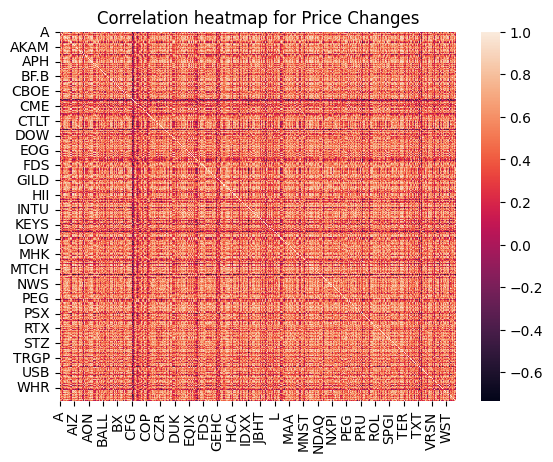

In [47]:
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes")